In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Uploading data set 

In [2]:
x_train = pd.read_csv("csvTrainImages 60k x 784.csv")
y_train = pd.read_csv("csvTrainLabel 60k x 1.csv")
x_test = pd.read_csv("csvTestImages 10k x 784.csv")
y_test = pd.read_csv("csvTestLabel 10k x 1.csv")

## Data Cleaning 

In [3]:
#check for missing values
print("Number of missing values:", np.isnan(x_train).sum())

Number of missing values: 0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.491    0
0.492    0
0.493    0
0.494    0
0.495    0
Length: 784, dtype: int64


In [4]:
#check for missing values
print("Number of missing values:", np.isnan(x_train).sum())
print("Number of missing values:", np.isnan(y_train).sum())
print("Number of missing values:", np.isnan(x_test).sum())
print("Number of missing values:", np.isnan(y_test).sum())

Number of missing values: 0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.491    0
0.492    0
0.493    0
0.494    0
0.495    0
Length: 784, dtype: int64
Number of missing values: 0    0
dtype: int64
Number of missing values: 0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.543    0
0.544    0
0.545    0
0.546    0
0.547    0
Length: 784, dtype: int64
Number of missing values: 0    0
dtype: int64


In [5]:
# concatenate to facilitate drop duplicates
x = np.array(np.concatenate((x_train, x_test)), dtype='float64')
y = np.array(np.concatenate((y_train, y_test)), dtype='int64')

In [6]:
# Flatten images into 1D array
x_flat = x.reshape(x.shape[0], -1)

In [7]:
# Find unique rows in flattened array
unique_rows, indices = np.unique(x_flat, axis=0, return_index=True)

In [8]:
# Check for duplicates
if len(unique_rows) == x_flat.shape[0]:
    print("No duplicates found.")
else:
    print("Duplicates found.")

Duplicates found.


In [9]:
# Drop duplicates
x_unique = x[indices]
y_unique = y[indices]

In [10]:
# Print the new shapes of the data
print("X shape:", x.shape)
print("y shape:", y.shape)

X shape: (69998, 784)
y shape: (69998, 1)


In [11]:
# Reshape the figures
x= x.reshape(-1, 28, 28, 1)

In [12]:
# Normalize the data
x/= 255.0
y= to_categorical(y)

## Preparing data for our model 

In [13]:
# split the dataset into 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
# print the sizes of the training and testing sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 48998
Testing set size: 21000


In [15]:
# We need to normalize the pictures to make it easy for the NN to make the calculation
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

# 1. Applying ANN 

In [16]:
# Define the architecture of the ANN
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # Flatten the input image
model.add(Dense(128, activation='relu')) # Add a fully connected hidden layer with 128 neurons and ReLU activation
model.add(Dense(10, activation='softmax')) # Add a fully connected output layer with 10 neurons and softmax activation

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the MNIST dataset
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1532/1532 [==============================] - 8s 4ms/step - loss: 0.1933 - accuracy: 0.9506 - val_loss: 0.1036 - val_accuracy: 0.9695
Epoch 2/10
1532/1532 [==============================] - 6s 4ms/step - loss: 0.0811 - accuracy: 0.9761 - val_loss: 0.0766 - val_accuracy: 0.9771
Epoch 3/10
1532/1532 [==============================] - 7s 4ms/step - loss: 0.0571 - accuracy: 0.9833 - val_loss: 0.0658 - val_accuracy: 0.9799
Epoch 4/10
1532/1532 [==============================] - 6s 4ms/step - loss: 0.0419 - accuracy: 0.9881 - val_loss: 0.0595 - val_accuracy: 0.9821
Epoch 5/10
1532/1532 [==============================] - 6s 4ms/step - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.0543 - val_accuracy: 0.9845
Epoch 6/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.0247 - accuracy: 0.9927 - val_loss: 0.0521 - val_accuracy: 0.9853
Epoch 7/10
1532/1532 [==============================] - 6s 4ms/step - loss: 0.0190 - accuracy: 0.9944 - val_loss: 0.0485 - val_accuracy:

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

657/657 [==============================] - 1s 2ms/step - loss: 0.0487 - accuracy: 0.9873
0.987333357334137


In [18]:
model.save("handwritten.model");

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [19]:
# load the model that we saved 
model = tf.keras.models.load_model('handwritten.model')

In [20]:
predictions = model.predict([X_test])

657/657 [==============================] - 1s 2ms/step


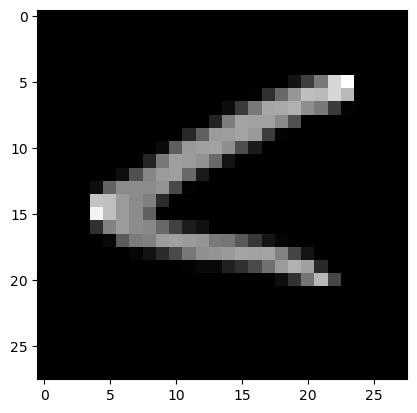

In [21]:
plt.imshow(X_test[5485], cmap='gray')
plt.show()

In [22]:
print(np.argmax(predictions[5485]))

8


# 2. Applying CNN 

In [23]:
# Define the architecture of the CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1532/1532 [==============================] - 30s 19ms/step - loss: 0.1186 - accuracy: 0.9647 - val_loss: 0.0416 - val_accuracy: 0.9878
Epoch 2/10
1532/1532 [==============================] - 29s 19ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0268 - val_accuracy: 0.9916
Epoch 3/10
1532/1532 [==============================] - 30s 19ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.0277 - val_accuracy: 0.9924
Epoch 4/10
1532/1532 [==============================] - 31s 20ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0256 - val_accuracy: 0.9923
Epoch 5/10
1532/1532 [==============================] - 28s 19ms/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.0296 - val_accuracy: 0.9921
Epoch 6/10
1532/1532 [==============================] - 28s 19ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0367 - val_accuracy: 0.9896
Epoch 7/10
1532/1532 [==============================] - 29s 19ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0247 -

In [26]:
# Evaluate the model on the testing dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Save the model
model.save('arabic_digits_cnn_model.h5')

657/657 [==============================] - 4s 6ms/step - loss: 0.0212 - accuracy: 0.9943
Test accuracy: 0.9943333268165588


In [27]:
# load the model that we saved 
model = tf.keras.models.load_model('arabic_digits_cnn_model.h5')

In [28]:
# Evaluate the model on the test data
pred = model.predict([X_test])

657/657 [==============================] - 4s 6ms/step


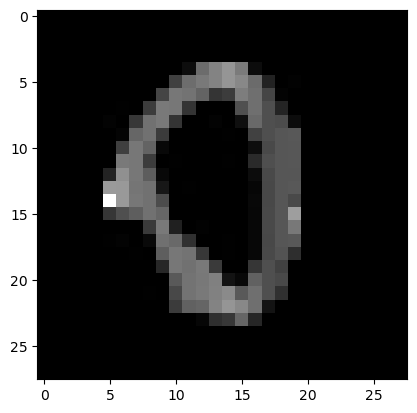

In [29]:
#plot a figure from x test
plt.imshow(X_test[188], cmap='gray')
plt.show()

In [30]:
print(np.argmax(pred[188]))

5


# Calculate accuracy, precision, recall and f- score for ANN 

In [31]:
# Load the ANN model and make predictions on the testing dataset
ann_model = tf.keras.models.load_model('handwritten.model')
ann_pred = ann_model.predict(X_test)

657/657 [==============================] - 2s 2ms/step


In [32]:
# Convert the predictions to classes
ann_pred_classes = np.argmax(ann_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [33]:
# Calculate the evaluation metrics for the ANN
ann_accuracy = accuracy_score(y_test_classes, ann_pred_classes)
ann_precision = precision_score(y_test_classes, ann_pred_classes, average='weighted')
ann_recall = recall_score(y_test_classes, ann_pred_classes, average='weighted')
ann_f1 = f1_score(y_test_classes, ann_pred_classes, average='weighted')

In [34]:
print("ANN Accuracy:", ann_accuracy)
print("ANN Precision:", ann_precision)
print("ANN Recall:", ann_recall)
print("ANN F1-Score:", ann_f1)

ANN Accuracy: 0.9873333333333333
ANN Precision: 0.9873481578450443
ANN Recall: 0.9873333333333333
ANN F1-Score: 0.9873334570535443


# Calculate accuracy, precision, recall and f- score for CNN 

In [35]:
# Load the CNN model and make predictions on the testing dataset
cnn_model = tf.keras.models.load_model('arabic_digits_cnn_model.h5')
cnn_pred = cnn_model.predict(X_test)

657/657 [==============================] - 4s 6ms/step


In [36]:
# Convert the predictions to classes
cnn_pred_classes = np.argmax(cnn_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [37]:
# Calculate the evaluation metrics for the CNN
cnn_accuracy = accuracy_score(y_test_classes, cnn_pred_classes)
cnn_precision = precision_score(y_test_classes, cnn_pred_classes, average='weighted')
cnn_recall = recall_score(y_test_classes, cnn_pred_classes, average='weighted')
cnn_f1 = f1_score(y_test_classes, cnn_pred_classes, average='weighted')

In [38]:
# Print the evaluation metrics for the CNN algorithm
print("CNN Accuracy:", cnn_accuracy)
print("CNN Precision:", cnn_precision)
print("CNN Recall:", cnn_recall)
print("CNN F1-Score:", cnn_f1)

CNN Accuracy: 0.9943333333333333
CNN Precision: 0.9943401033963067
CNN Recall: 0.9943333333333333
CNN F1-Score: 0.9943285134872311


# Compare the result between ANN and CNN 

In [41]:
if ann_accuracy > cnn_accuracy:
    print("The ANN algorithm has the best accuracy.")
else:
    print("The CNN algorithm has the best accuracy.")

if ann_precision > cnn_precision:
    print("The ANN algorithm has the best precision.")
else:
    print("The CNN algorithm has thebest precision.")

if ann_recall > cnn_recall:
    print("The ANN algorithm has the best recall.")
else:
    print("The CNN algorithm has the best recall.")

if ann_f1 > cnn_f1:
    print("The ANN algorithm has the best F1-Score.")
else:
    print("The CNN algorithm has the best F1-Score.")

The CNN algorithm has the best accuracy.
The CNN algorithm has thebest precision.
The CNN algorithm has the best recall.
The CNN algorithm has the best F1-Score.
